<a href="https://colab.research.google.com/github/nnhuy20130281/Lab_ML_NguyenNgocHuy/blob/main/Lab_4_20130281_NguyenNgocHuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [6]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression



drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy :  0.9733333333333334
Precision :  [1.         0.97916667 0.94230769]


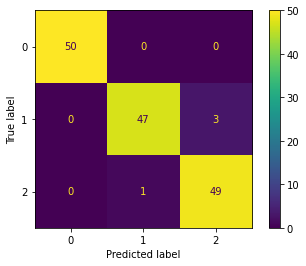

In [12]:

data4 = datasets.load_iris()
X=data4['data']
Y=data4['target']
classifier = LogisticRegression(random_state=0)
classifier.fit(X,Y)
y_pred = classifier.predict(X)
print(y_pred)
cm = confusion_matrix(Y, y_pred)
print(cm)
print ("Accuracy : ", accuracy_score(Y, y_pred)) 
print ("Precision : ", precision_score(Y, y_pred,average=None)) 
ConfusionMatrixDisplay.from_predictions(Y, y_pred)

<function print>

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



[0 1 2 ... 8 9 8]
[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]
Accuracy :  1.0
Precision :  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


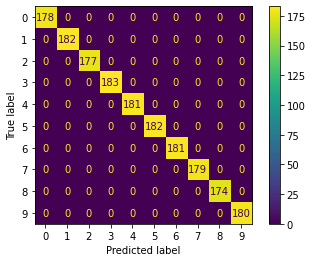

In [8]:
mnist = datasets.load_digits()
X2=mnist ['data']
Y2=mnist ['target']
classifier = LogisticRegression(random_state=0)
classifier.fit(X2,Y2)
y_pred2 = classifier.predict(X2)
print(y_pred2)
cm = confusion_matrix(Y2, y_pred2)
print(cm)
print ("Accuracy : ", accuracy_score(Y2, y_pred2)) 
print ("Precision : ", precision_score(Y2, y_pred2,average='micro')) 
ConfusionMatrixDisplay.from_predictions(Y2, y_pred2)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


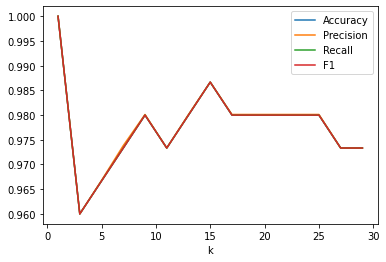

In [14]:
k_range=range(1,30,2)
accs=[]
prec=[]
recall=[]
f1=[]
for k in k_range:
  kNN1= KNeighborsClassifier(n_neighbors=k)
  kNN1.fit(X,Y)
  y_pred3 = kNN1.predict(X)
  accs.append(accuracy_score(Y, y_pred3))
  prec.append(precision_score(Y, y_pred3, average='macro'))
  recall.append(recall_score(Y, y_pred3, average='macro'))
  f1.append(f1_score(Y, y_pred3,average='macro'))
plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel("k")
plt.legend()

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


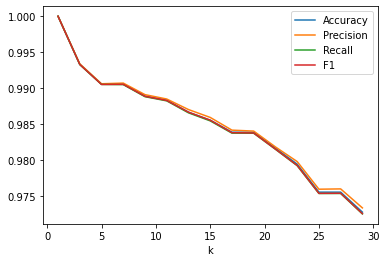

In [15]:
accs2=[]
prec2=[]
recall2=[]
f12=[]
for k in k_range:
  kNN2= KNeighborsClassifier(n_neighbors=k)
  kNN2.fit(X2,Y2)
  y_pred4 = kNN2.predict(X2)
  accs2.append(accuracy_score(Y2, y_pred4))
  prec2.append(precision_score(Y2, y_pred4, average='macro'))
  recall2.append(recall_score(Y2, y_pred4, average='macro'))
  f12.append(f1_score(Y2, y_pred4, average='macro'))
plt.plot(k_range, accs2, label='Accuracy')
plt.plot(k_range, prec2, label='Precision')
plt.plot(k_range, recall2, label='Recall')
plt.plot(k_range, f12, label='F1')
plt.xlabel("k")
plt.legend()
     

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [16]:
data5 = pd.read_csv('spambase.csv', header=None)
Y5 = data5.iloc[: , -1]
X5 = data5.iloc[: , :57]
accs_5=[]
prec_5=[]
recall_5=[]
f1_5=[]
tree_model = DecisionTreeClassifier()
kNN_model= KNeighborsClassifier()
regress_model = LogisticRegression()
tree_model.fit(X5, Y5)
kNN_model.fit(X5, Y5)
regress_model.fit(X5, Y5)
y_predTree = tree_model.predict(X5)
y_predkNN =kNN_model.predict(X5)
y_predRegres =regress_model.predict(X5)
accs_5.append(accuracy_score(Y5, y_predTree))
accs_5.append(accuracy_score(Y5, y_predkNN))
accs_5.append(accuracy_score(Y5, y_predRegres))
prec_5.append(precision_score(Y5, y_predTree, average='macro'))
prec_5.append(precision_score(Y5, y_predkNN, average='macro'))
prec_5.append(precision_score(Y5, y_predRegres, average='macro'))
recall_5.append(recall_score(Y5, y_predTree, average='macro'))
recall_5.append(recall_score(Y5, y_predkNN, average='macro'))
recall_5.append(recall_score(Y5, y_predRegres, average='macro'))
f1_5.append(f1_score(Y5, y_predTree, average='macro'))
f1_5.append(f1_score(Y5, y_predkNN, average='macro'))
f1_5.append(f1_score(Y5, y_predRegres, average='macro'))
List = pd.DataFrame({ 'Accuracy': accs_5, 'Precision': prec_5, 'Recall': recall_5, 'F1': f1_5}, index=['DecisionTree','KNeighbors', 'LogisticReg'])
print(List)
print('\nDecisionTree')
print(confusion_matrix(Y5, y_predTree))
print('\nKNeighbors')
print(confusion_matrix(Y5, y_predkNN))
print('\nLogisticReg')
print(confusion_matrix(Y5, y_predRegres))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              Accuracy  Precision    Recall        F1
DecisionTree  0.999348   0.999463  0.999173  0.999317
KNeighbors    0.872419   0.866978  0.865311  0.866120
LogisticReg   0.923712   0.920567  0.919498  0.920024

DecisionTree
[[2788    0]
 [   3 1810]]

KNeighbors
[[2506  282]
 [ 305 1508]]

LogisticReg
[[2619  169]
 [ 182 1631]]


#Finally,
Save a copy in your Github. Remember renaming the notebook.